## Filling/Imputing NUll values for Numerical data: Pima dataset Analysis

Sometimes, in datasets, we need to modify/change the values of data before applying any machine learning model to it. Those corrections can be of many forms. One of these kinds is missing values in the dataset. Its important to clean those missing values before building any model. Missing values can be both categorical or numerical. Both need to handled in different ways. 

Missing numerical values will have adverse effect on a model. Some ML model dont even take null values for building the model, while others ignore those missing values. But ignoring missing values can have a negative effect on the accuracy of the model. So its good practice to fill/impute those missing values as much as possible.

For our next data cleaning task, we want to analyze the pima diabetic dataset. The dataset analyzes medical records for pima Indians and predicts whether or not a patient will have diabetes or not based on their record.

## Motivation/Problem Description:

Our goal is to apply a ML classification model using this dataset that will classify if a pima indian will have diabetes or not based on the given features. The dataset in itself doesnt have any NULL/missing values but there are many 0 value in the dataset . But based on the features , those 0's can be regarded as NULL values. So before applying any model to the data, we need to clean/fill up those missing values.

### Load the dataset

Our first task is to load the libraries and the `pima.csv` dataset into a dataframe. We load the pandas library, load our data into the dataframe `pima` and view the dataframe.      

In [1]:
import pandas as pd
#import numpy as np

pima= pd.read_csv("../datasets/pima_diabetes.csv")

pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Steps:**
   -  Define variable `pima`.
   -  Use the pandas library to read the dataset from source destination.
   - Assign the read data into the `pima` variable.
   - View the  `pima` variable.

### Check for NULL values

For checking the null values, we use the `isnull()` command used previously.

In [2]:
pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We see there are no NULL values in the dataset. But there are lots of 0 values in columns which cant be 0 i.e. `Skin_Thickness`, `Insulin`. 

On the other hand, the `pregnancies`,`Class` columns can have 0 values. 

So we first separate these columns (`pregnancies`,`Class`) and use the other columns for processing. 

**Steps:**
   - Define a variable `X`.
   - From the pima dataframe, take all the columns except (pregnancies,Class) columns and assign to `X`.
   - View `X`.

In [3]:
# X= pima[['Glucose', 'Blood_Pressure', 'Skin_Thickness','Insulin','BMI','Diabetic_function','Age']]
# X.head()

X= pima.drop(['Pregnancies','Outcome'],axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


From now on, we will use this dataframe to process the NULL data. 
We count the 0 values in `X` since they will be counted as NULL values.

**Steps:**
   -  define a variable `num_missing`
   - select the dataframe and the sum() command and set to `num_missing`.
   - view the variable `num_missing`
  

In [4]:
#X.loc[:,X.columns]

num_missing = (X[X.columns] == 0).sum()
print(num_missing)

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


From this list, we see the 0 values for each column in the dataset. The columns `Diabetic_function` and `Age` have no 0 values.So we can say there are no NULL values in them. For the other columns, if we evaluate them carefully, the columns `Glucose`,`Blood_Pressure`,`Skin_Thickness` `Insulin` and `BMI` have 0 values.                    

Columns `Glucose`, `Blood_Pressure` and `BMI` have few columns as 0. But columns `Skin_Thickness` and `Insulin` have lots of 0 values. 

For this task ,we focus on correcting the `Insulin` and `SkinThickness` values. We have to define them as NULL values. Since we are concerned only about the 2 (Skin_Thickness ,Insulin) columns to process, we define the zeros in those columns as NULL.

## Define 0's as NULL values

### convert  `skin_thickness` and `insulin` value to NULL.

In [5]:
X[['SkinThickness','Insulin']] = X[['SkinThickness','Insulin']].replace(0, np.nan)

In [6]:
X.isnull().sum()

Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

So, in this step, we have marked the `0`'s of variable `Insulin` and `SkinThickness` as `NULL` value. Now we can do further processing of handling these NULL values.First, We view the dataframe to observe the NULL values.

In [7]:
X.head(20)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35.0,NaN,33.6,0.627,50
1,85,66,29.0,NaN,26.6,0.351,31
2,183,64,NaN,NaN,23.3,0.672,32
3,89,66,23.0,94.0,28.1,0.167,21
4,137,40,35.0,168.0,43.1,2.288,33
5,116,74,NaN,NaN,25.6,0.201,30
6,78,50,32.0,88.0,31.0,0.248,26
7,115,0,NaN,NaN,35.3,0.134,29
8,197,70,45.0,543.0,30.5,0.158,53
9,125,96,NaN,NaN,0.0,0.232,54


## Fill columns with values

### Observe Values Distribution:

Filling NULL values for a column depends on the type of column data. If the column data is numerical, the missing values can be filled using aggregation methods like mean, median.

For `Skin_Thickness` column, we can see the values are numerical. 
   
In order to fill the missing values of `Skin_Thickness`, its important to see distribution of its data. We can use histogram for it. 

array([[<AxesSubplot:title={'center':'SkinThickness'}>]], dtype=object)

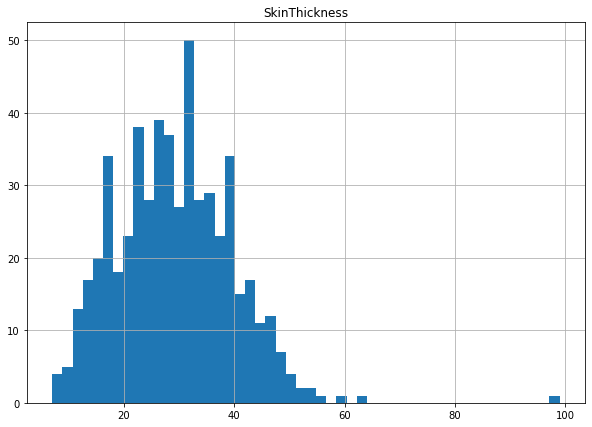

In [8]:
X.hist(column='SkinThickness',bins=50,figsize=(10,7))

From the histogram above, we can see the data distribution of data is a normal distribution. In this scenario, to impute the missing values, we can use the mean of the `Skin_Thickness` column.

Similarly, for `Insulin` value, the values are continuous.

We look at the distribution of its data.

The distibution of the `Insulin` data is right skewed meaning most of the values are on the left side. In this scenario, its better to fill the missing values using the median of the `Insulin` column since median value will give a better estimation of the `Insulin` data. 

array([[<AxesSubplot:title={'center':'Insulin'}>]], dtype=object)

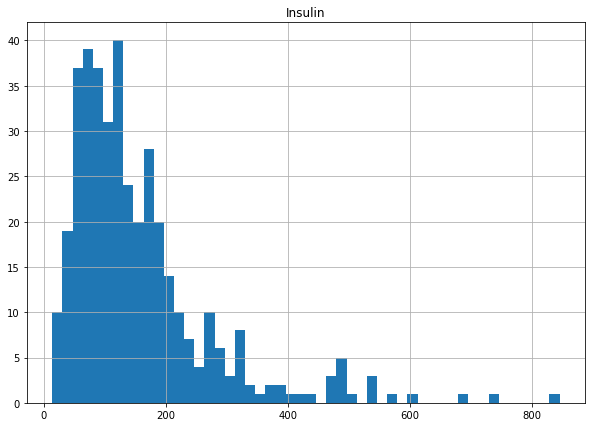

In [9]:
X.hist(column='Insulin',bins=50,figsize=(10,7))

### Fill column with mean values

In [10]:
X['SkinThickness'].fillna(X['SkinThickness'].mean(), inplace=True)
X.head(20)

#dataset.fillna(dataset.mean(), inplace=True)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35.00000,NaN,33.6,0.627,50
1,85,66,29.00000,NaN,26.6,0.351,31
2,183,64,29.15342,NaN,23.3,0.672,32
3,89,66,23.00000,94.0,28.1,0.167,21
4,137,40,35.00000,168.0,43.1,2.288,33
5,116,74,29.15342,NaN,25.6,0.201,30
6,78,50,32.00000,88.0,31.0,0.248,26
7,115,0,29.15342,NaN,35.3,0.134,29
8,197,70,45.00000,543.0,30.5,0.158,53
9,125,96,29.15342,NaN,0.0,0.232,54


### Fill missing values with median values

In [11]:
X['Insulin'].fillna(X['Insulin'].median(), inplace=True)
X.head(20)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35.00000,125.0,33.6,0.627,50
1,85,66,29.00000,125.0,26.6,0.351,31
2,183,64,29.15342,125.0,23.3,0.672,32
3,89,66,23.00000,94.0,28.1,0.167,21
4,137,40,35.00000,168.0,43.1,2.288,33
5,116,74,29.15342,125.0,25.6,0.201,30
6,78,50,32.00000,88.0,31.0,0.248,26
7,115,0,29.15342,125.0,35.3,0.134,29
8,197,70,45.00000,543.0,30.5,0.158,53
9,125,96,29.15342,125.0,0.0,0.232,54


### Update the original dataframe with the new columns.

We update our changes to the original dataset by,
 - removing the `Nan` Insulin and SkinThickness columns
 - adding the newly calculated Insulin and SkinThickness column

In [12]:
pima.drop(['SkinThickness','Insulin'],axis=1,inplace=True)
pima

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101,76,32.9,0.171,63,0
764,2,122,70,36.8,0.340,27,0
765,5,121,72,26.2,0.245,30,0
766,1,126,60,30.1,0.349,47,1


In [13]:
pima[['SkinThickness','Insulin']] = X[['SkinThickness','Insulin']]
pima

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness,Insulin
0,6,148,72,33.6,0.627,50,1,35.00000,125.0
1,1,85,66,26.6,0.351,31,0,29.00000,125.0
2,8,183,64,23.3,0.672,32,1,29.15342,125.0
3,1,89,66,28.1,0.167,21,0,23.00000,94.0
4,0,137,40,43.1,2.288,33,1,35.00000,168.0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,32.9,0.171,63,0,48.00000,180.0
764,2,122,70,36.8,0.340,27,0,27.00000,125.0
765,5,121,72,26.2,0.245,30,0,23.00000,112.0
766,1,126,60,30.1,0.349,47,1,29.15342,125.0


## Export the dataframe into a CSV file

Our final task would be to export our cleaned data into a csv file which can use from now on. We can do it just by using the `to_csv` function call. 

In [14]:
pima.to_csv("pima_updated.csv")

## Conclusion